In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

In [11]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS'


In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [14]:
# Test set is usually 20% of the data
train_data = df.iloc[:109] # .loc[:'1940-01-01'] also works
test_data = df.iloc[108:]

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Additive: x_t = Trend + Seasonal + Random
# Multiplicative: x_t = Trend * Seasonal * Random
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul',
                                    seasonal='mul', 
                                    seasonal_periods=12).fit()

c:\Users\Yuhang\anaconda3\envs\ai-env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [27]:
test_predictions = fitted_model.forecast(36)
test_predictions.head()

1958-02-01    339.142929
1958-03-01    399.281670
1958-04-01    394.233619
1958-05-01    402.545275
1958-06-01    473.128728
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

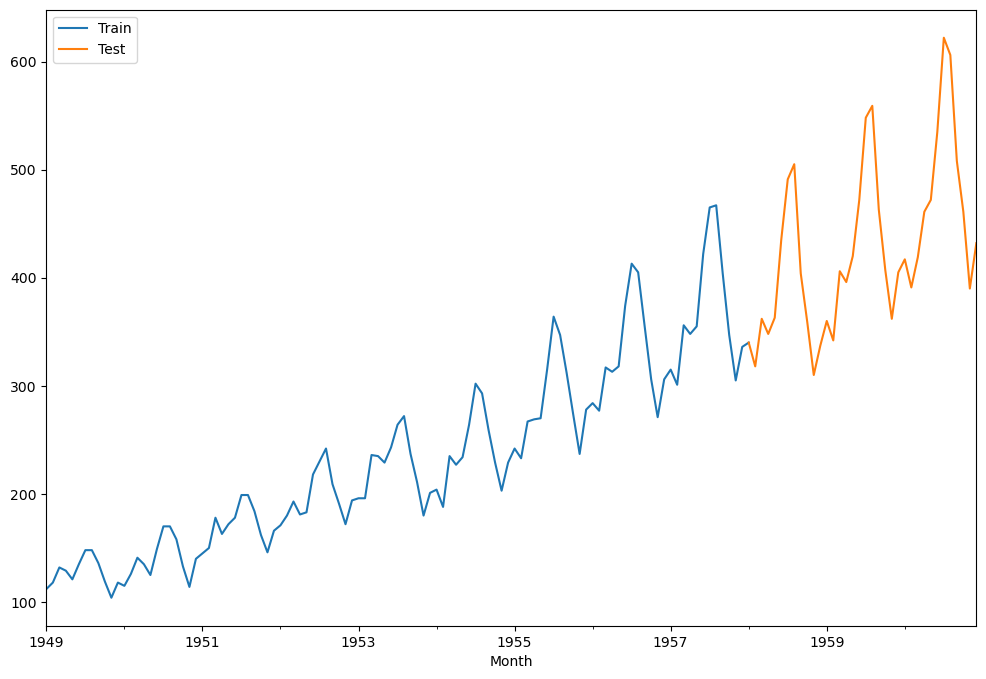

In [28]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')

<Axes: xlabel='Month'>

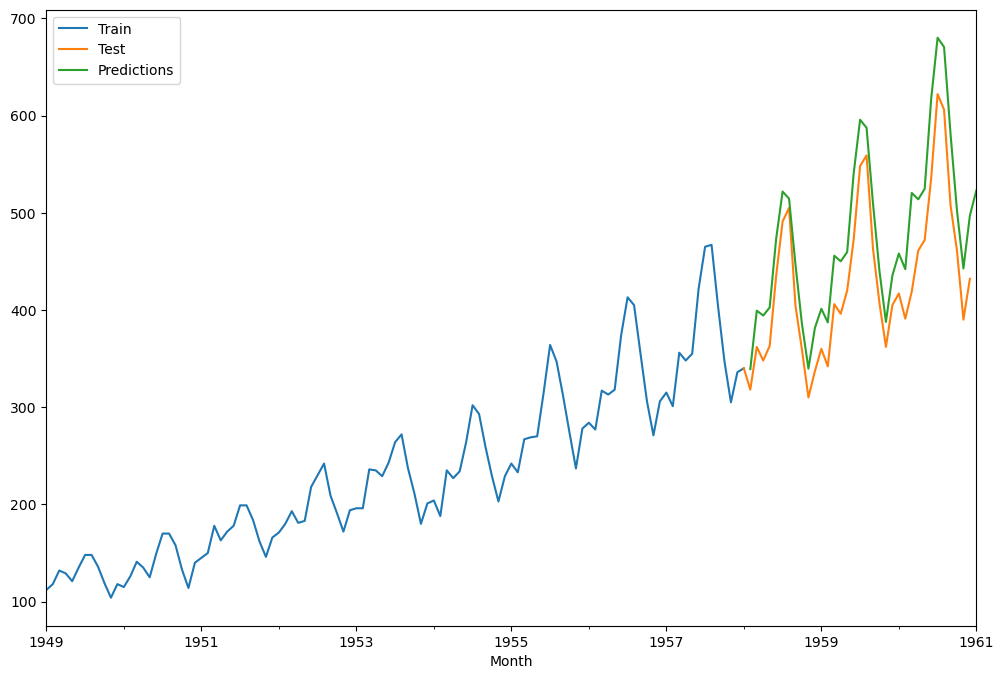

In [31]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions')

<Axes: xlabel='Month'>

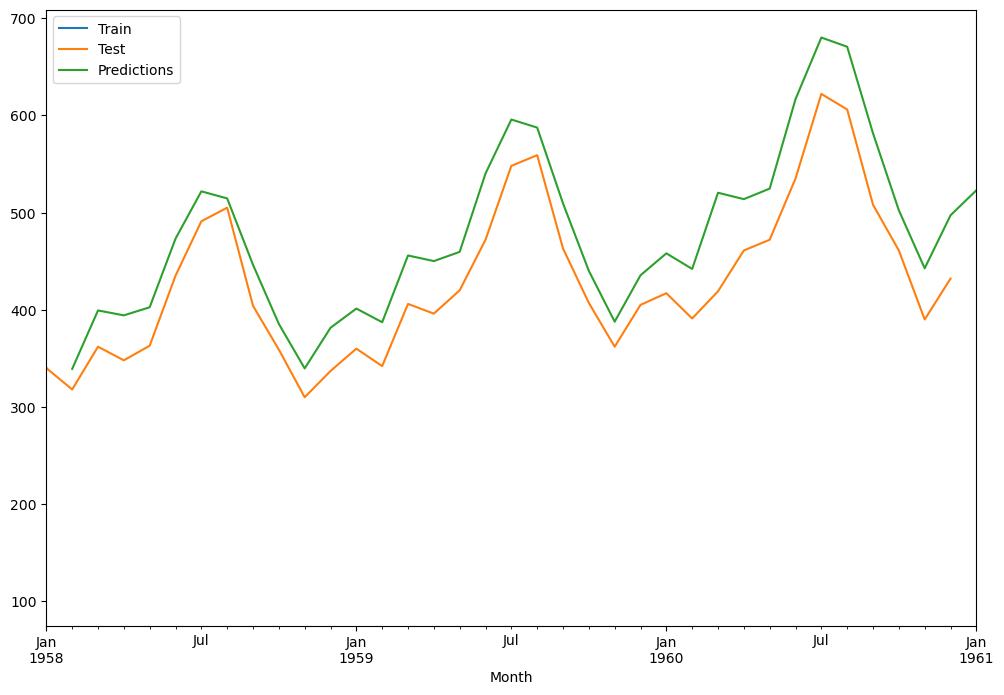

In [32]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions', xlim=['1958-01-01', '1961-01-01'])

In [39]:
# Evaluating Predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test_data['Thousands of Passengers'], test_predictions))
print(mean_squared_error(test_data['Thousands of Passengers'], test_predictions))
print(np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], test_predictions)))

63.031171575091825
5614.266734155986
74.92841072754705


In [40]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\Users\Yuhang\anaconda3\envs\ai-env\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [41]:
forcast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

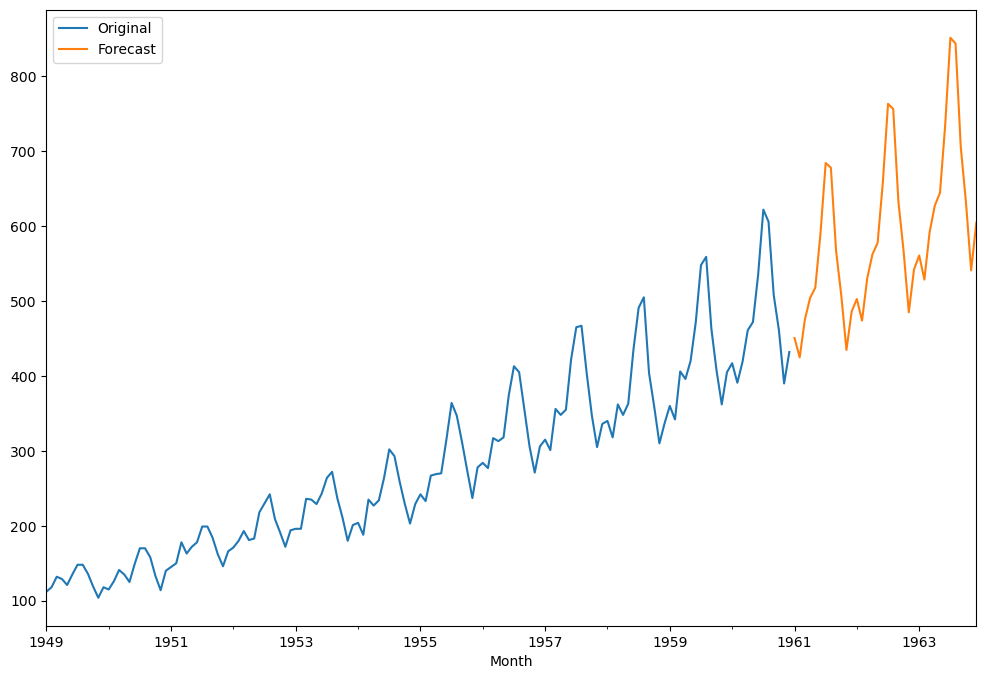

In [42]:
df['Thousands of Passengers'].plot(legend=True, label='Original', figsize=(12,8))
forcast_predictions.plot(legend=True, label='Forecast')

In [44]:
df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

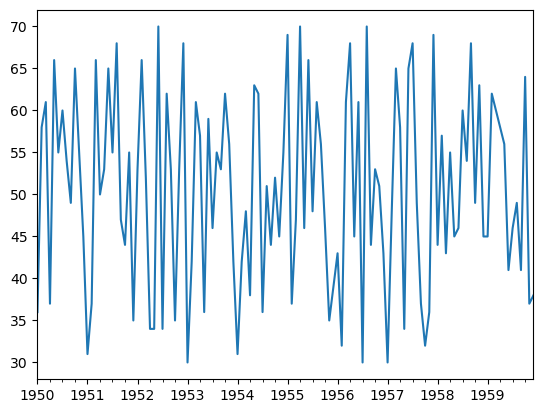

In [45]:
df2['a'].plot()

<Axes: >

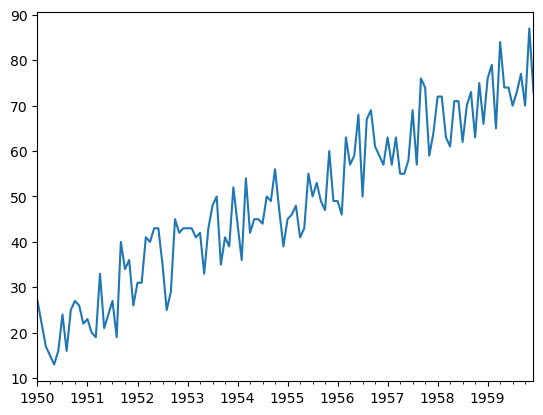

In [47]:
df2['b'].plot()

In [49]:
from statsmodels.tsa.statespace.tools import diff
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

In [53]:
# ACF and PACF, Autocorrelation and Partial Autocorrelation
a = [1, 2 , 3 ,4 ,5]
a[0:2] = reversed(a[0:2])
a

[2, 1, 3, 4, 5]

In [54]:
a = []
a.append(1)
print(a) # [1]

[1]
